In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import zscore
from scipy.stats import kurtosis, skew
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_regress_exog
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv(r"D:\Stat TABA\Stat_Repeat\Credit.csv")

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,52,1,6,9,29,16.3,1.715901,3.011099
1,48,1,22,15,100,9.1,3.703700,5.396300
2,36,2,9,6,49,8.6,0.817516,3.396484
3,36,2,13,6,41,16.4,2.918216,3.805784
4,43,1,23,19,72,7.6,1.181952,4.290048


# Descriptive Statistics

In [4]:
#figure no. 1 in report
means = df.mean()
stds = df.std()
kurt = df.kurtosis()
skew = df.skew()
des_df = pd.DataFrame({'Mean': means, 'Standard Deviation': stds, 'Kurtosis': kurt, 'Skewness': skew})
des_df

,Mean,Standard Deviation,Kurtosis,Skewness
age,34.871907,8.010628,-0.602846,0.370691
ed,1.730713,0.931457,0.711016,1.188987
employ,8.362445,6.633772,0.280487,0.843505
address,8.285298,6.850345,0.320110,0.946473
income,45.464338,36.628799,27.129917,3.927116
debtinc,10.225182,6.782480,1.273563,1.102277
creddebt,1.538002,2.096725,22.875620,3.959997
othdebt,3.051960,3.271137,10.437580,2.724495


In [5]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,34.871907,1.730713,8.362445,8.285298,45.464338,10.225182,1.538002,3.051960
std,8.010628,0.931457,6.633772,6.850345,36.628799,6.782480,2.096725,3.271137
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.368623,1.043060
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.850850,1.961712
75%,40.000000,2.000000,12.000000,12.000000,54.000000,14.050000,1.887698,3.930448
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600


In [6]:
df.shape

(687, 8)

In [7]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
dtype: object

### Pre-processing Data

In [8]:
df.duplicated().sum()

0

In [9]:
missing_values = df.isnull().sum()

In [10]:
missing_values

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

In [11]:
numZeros = (df == 0).sum().sum()
numZeros

108

In [12]:
df = df.replace(0, np.nan)
df = df.fillna(df.mean())

In [13]:
num_zeros = (df == 0).any(axis=1).sum()
num_zeros

0

C:\Program Files\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


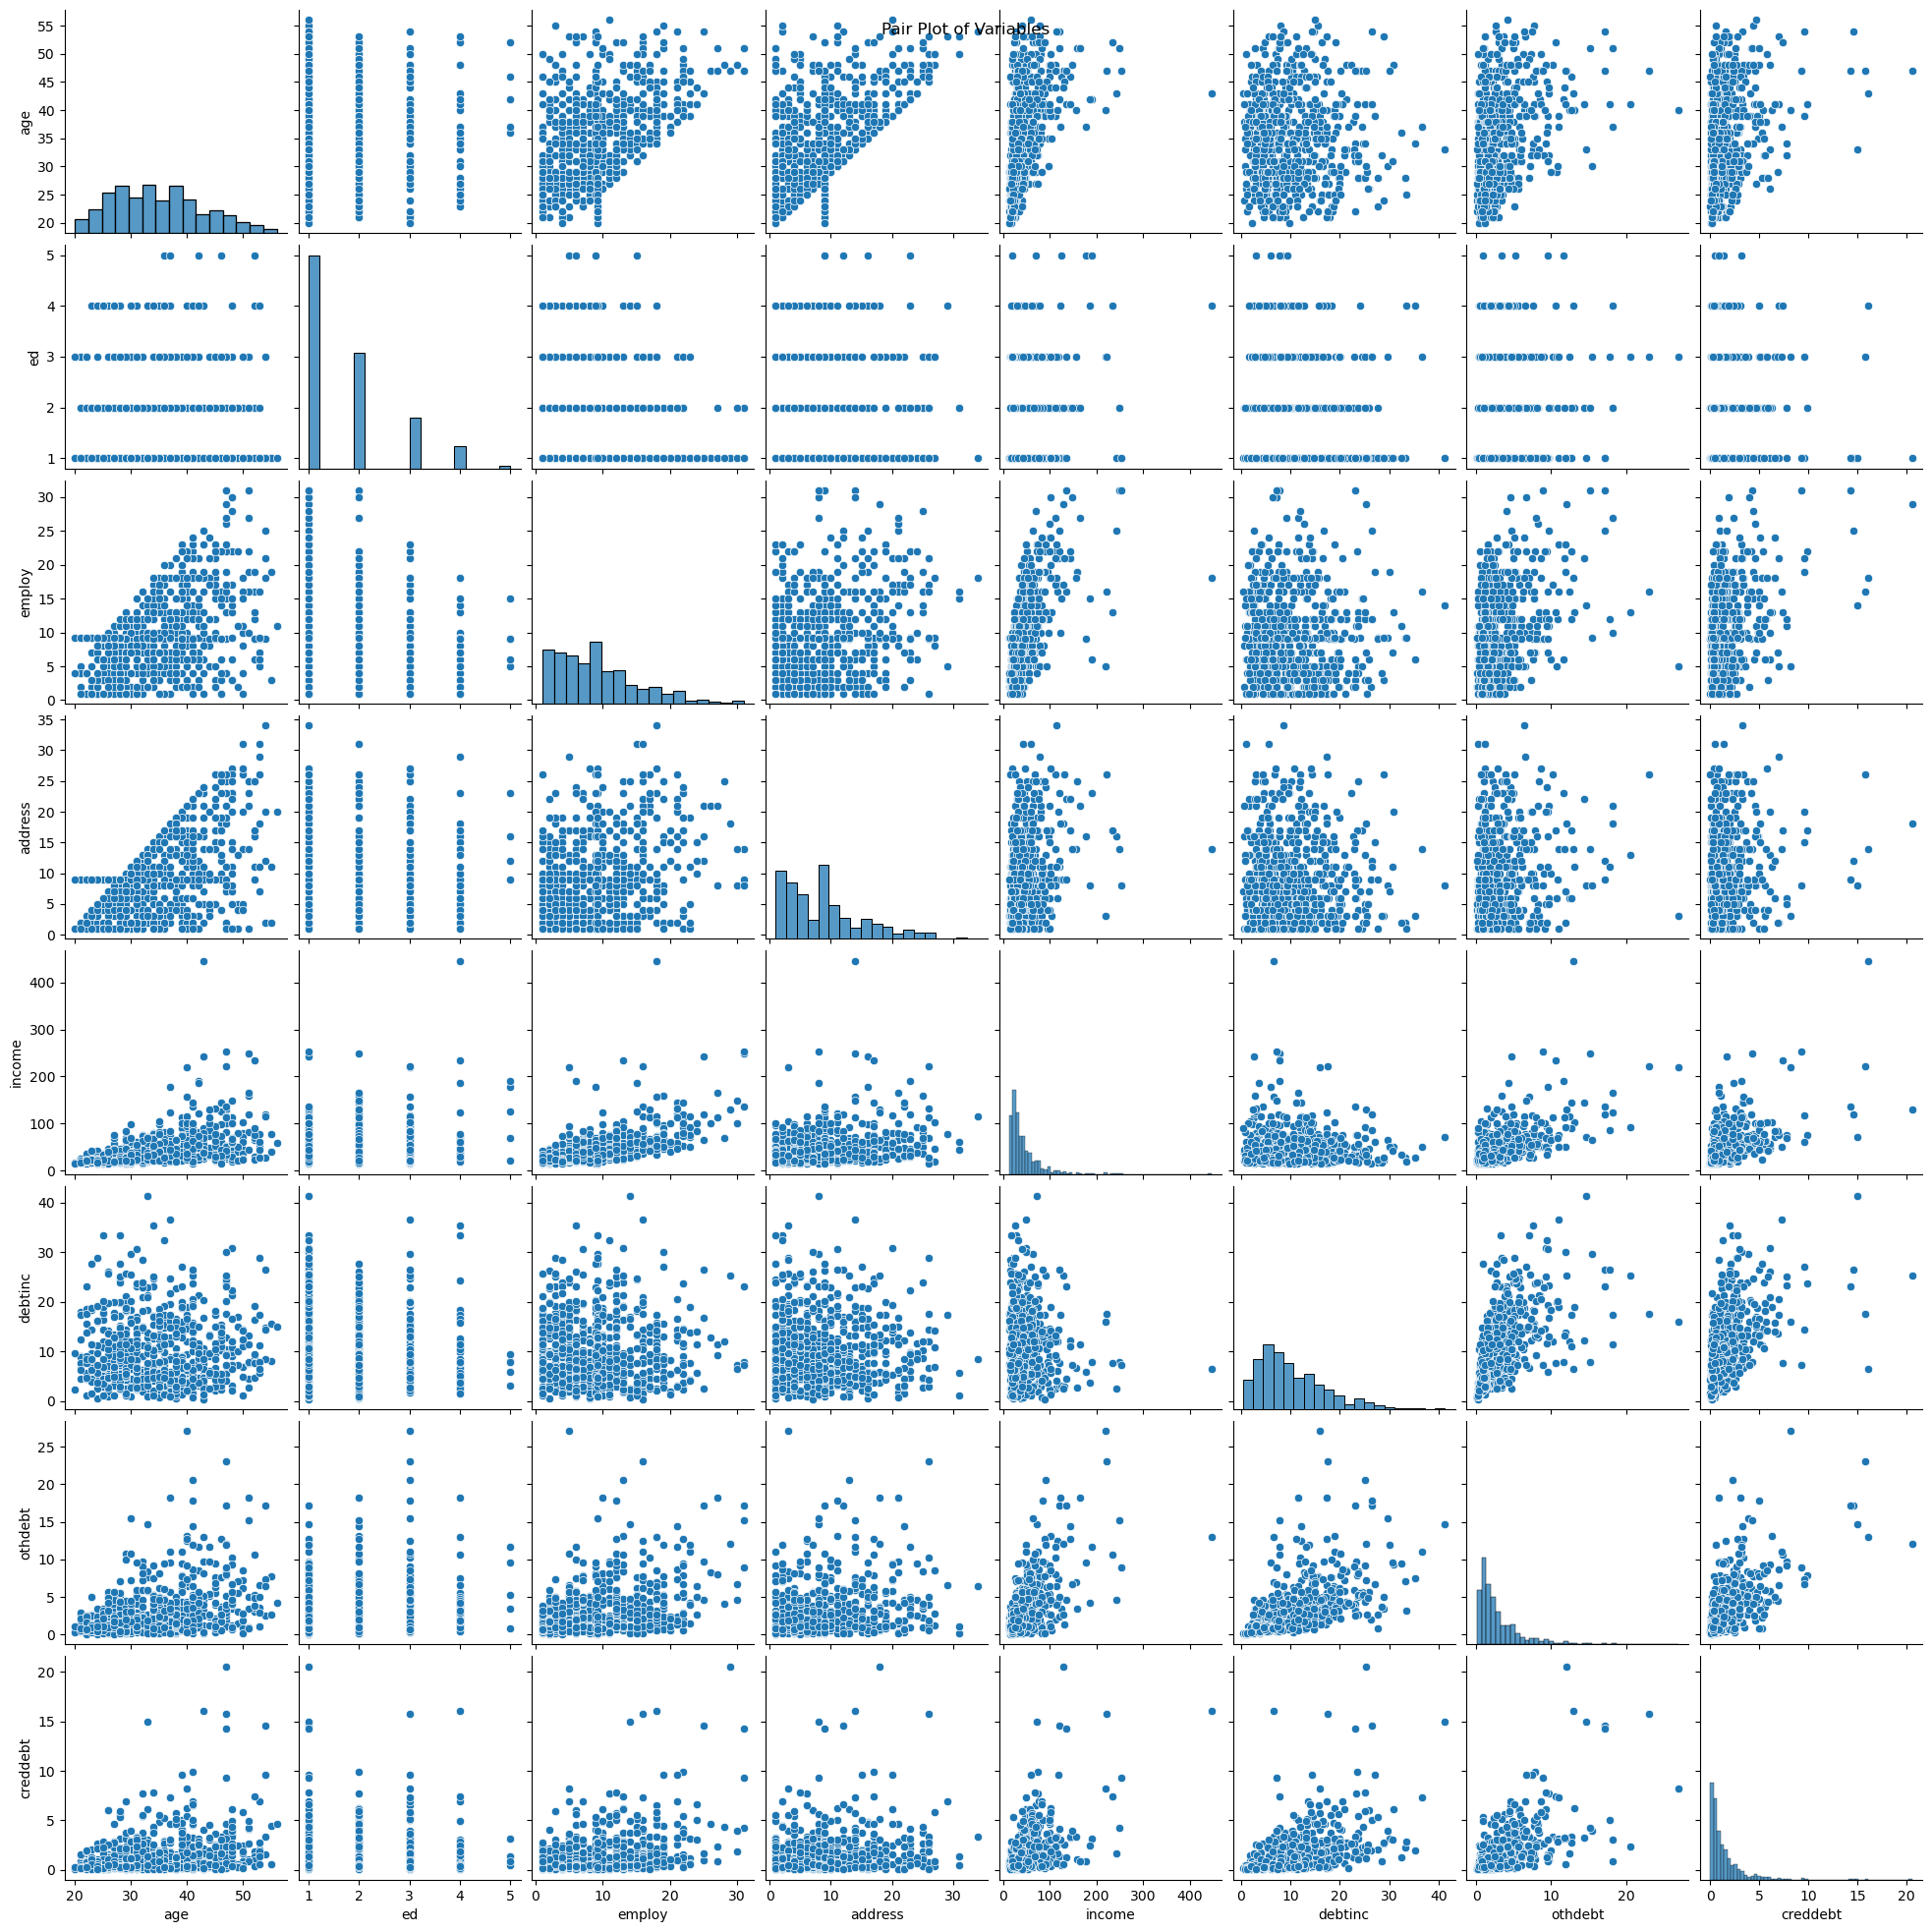

In [14]:
# Scatter plots with regression lines for selected pairs of variables
sns.pairplot(df[['age', 'ed', 'employ', 'address', 'income','debtinc', 'othdebt','creddebt']])
plt.suptitle('Pair Plot of Variables')
plt.show()

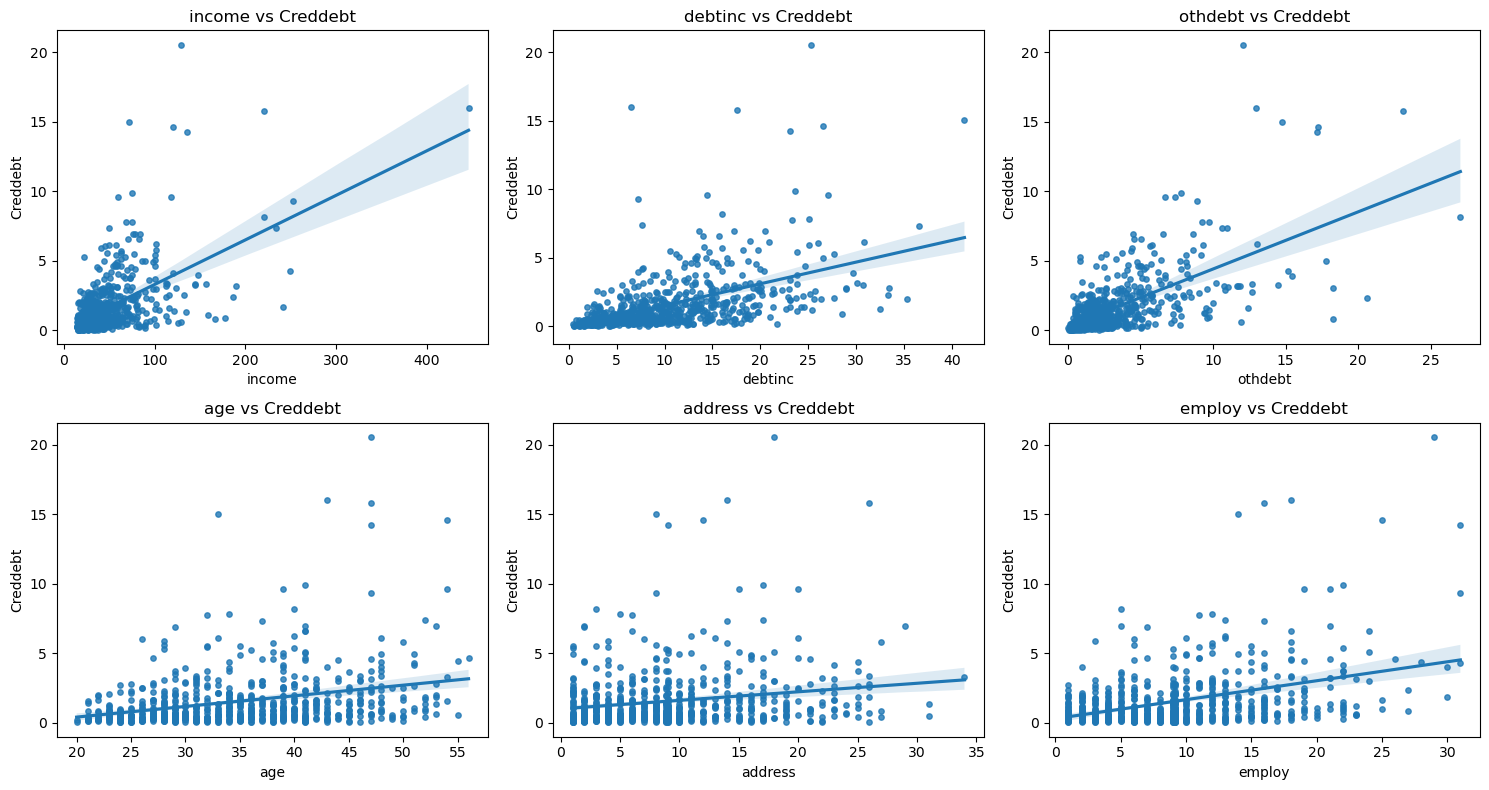

In [15]:
#figure no. 2 in report
# Set up subplots with 2 rows and 4 columns (adjust as needed based on your requirements)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each variable and create scatter plot with regression line
variables = ['income','debtinc', 'othdebt', 'age', 'address', 'employ']
for i, variable in enumerate(variables):
    sns.regplot(x=variable, y='creddebt', data=df, scatter_kws={'s': 15}, ax=axes[i])
    axes[i].set_title(f'{variable} vs Creddebt')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Creddebt')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Checking for Outliers using Boxplot

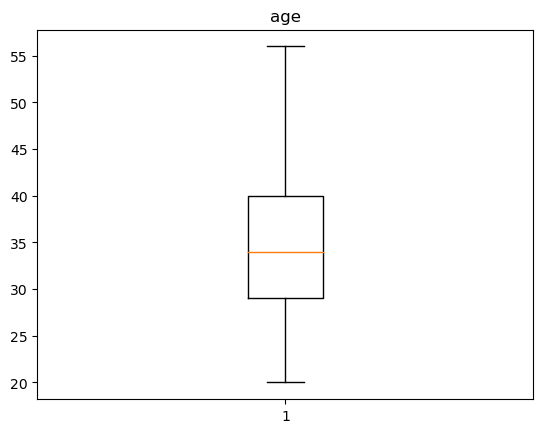

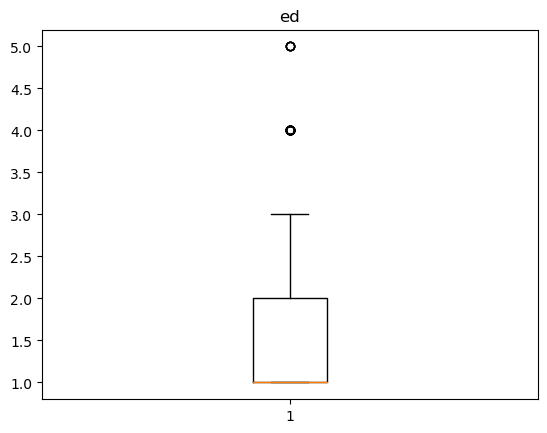

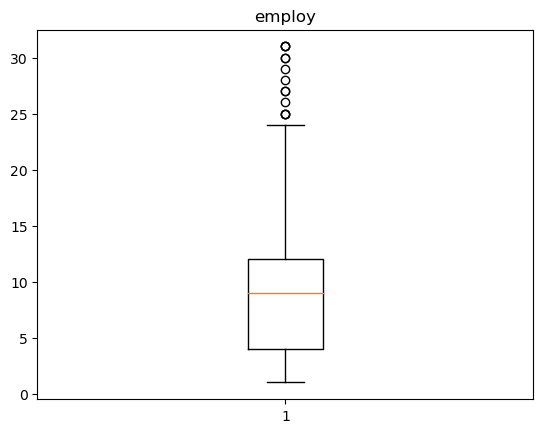

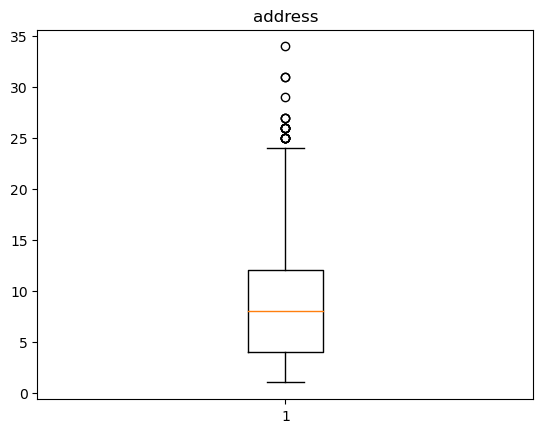

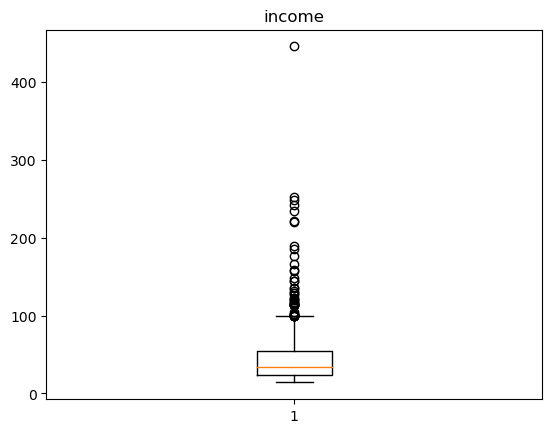

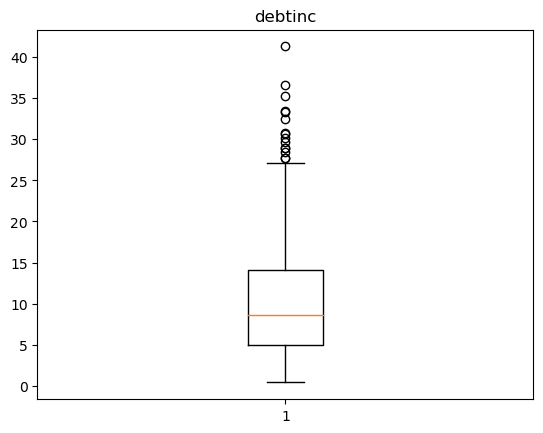

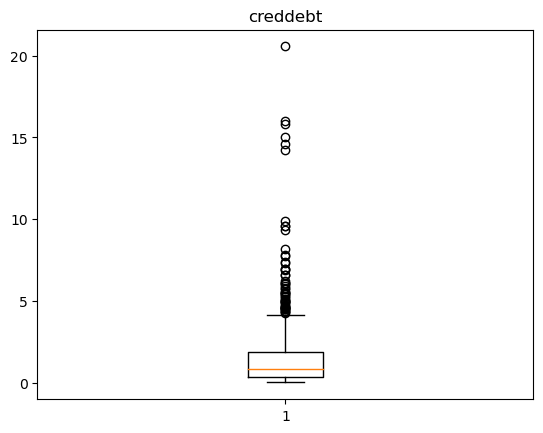

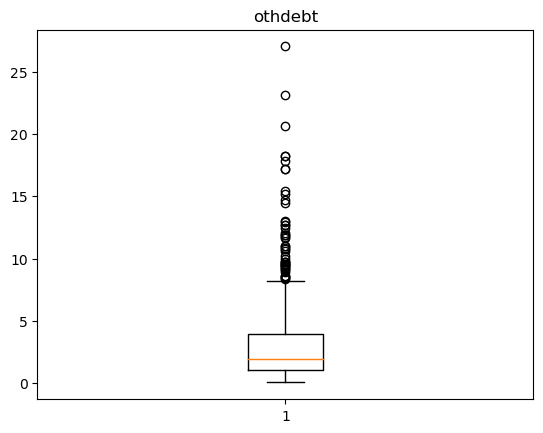

In [16]:
#figure no. 3 in report
for col in df.columns:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

In [17]:
df = df.drop(df[df['employ'] > 25].index)
df = df.drop(df[df['address'] > 25].index)
df = df.drop(df[df['income'] > 100].index)
df = df.drop(df[df['debtinc'] > 25].index)
df = df.drop(df[df['creddebt'] > 5].index)

In [18]:
df.shape

(594, 8)

In [19]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,52,1,6.0,9.0,29,16.3,1.715901,3.011099
1,48,1,22.0,15.0,100,9.1,3.703700,5.396300
2,36,2,9.0,6.0,49,8.6,0.817516,3.396484
3,36,2,13.0,6.0,41,16.4,2.918216,3.805784
4,43,1,23.0,19.0,72,7.6,1.181952,4.290048
...,...,...,...,...,...,...,...,...
682,36,2,6.0,15.0,27,4.6,0.262062,0.979938
683,29,2,6.0,4.0,21,11.5,0.369495,2.045505
684,33,1,15.0,3.0,32,7.6,0.491264,1.940736
685,45,1,19.0,22.0,77,8.4,2.302608,4.165392


# Checking for normality

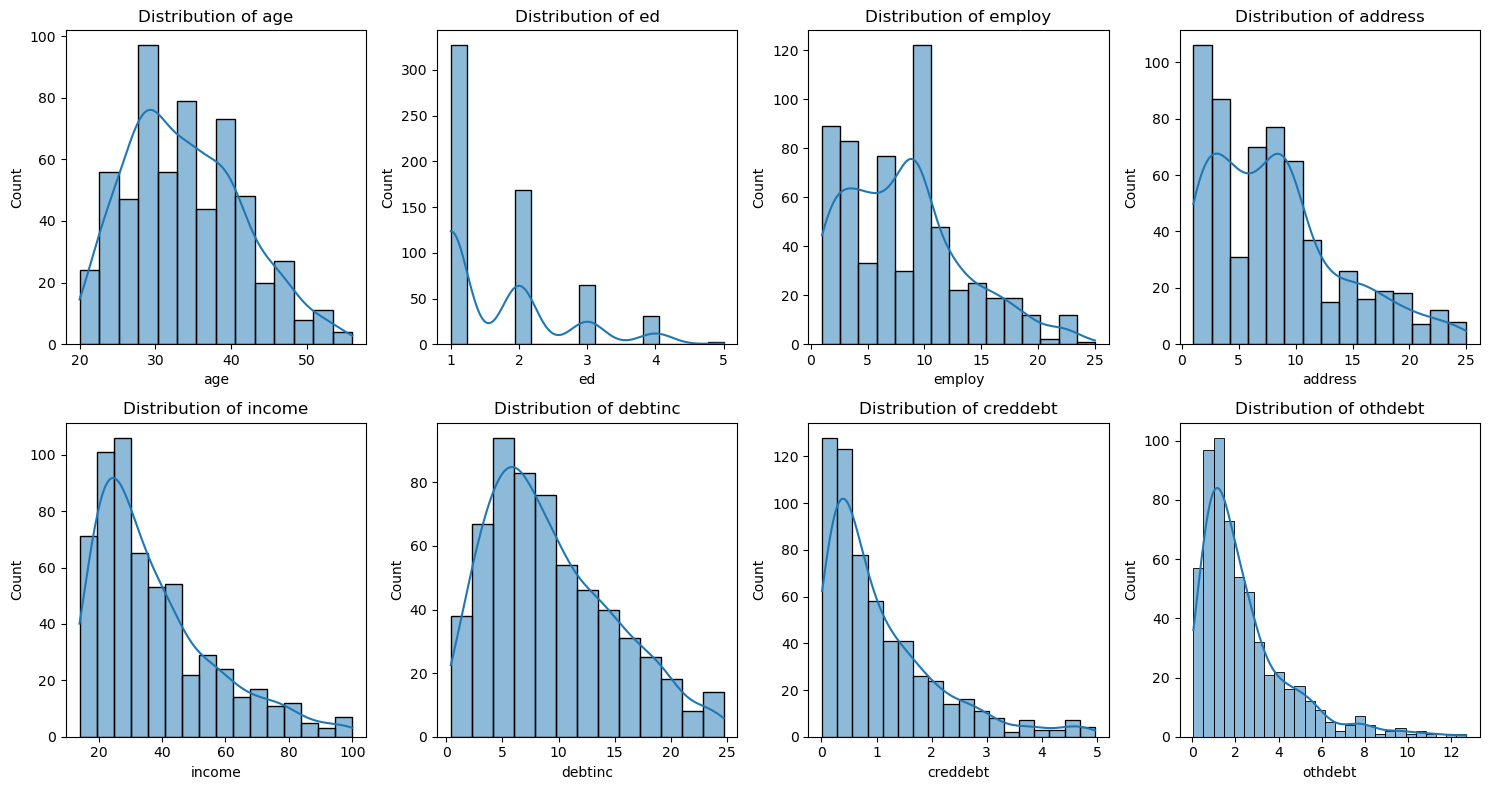

In [20]:
#figure no. 4 in report
# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Z-Score Normalization

In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Create a StandardScaler object
scaler = StandardScaler()
# Create a copy of the original DataFrame
df_transformed = df.copy()
# Fit and transform the numeric columns
df_transformed[numeric_columns] = scaler.fit_transform(df_transformed[numeric_columns])
# The numeric columns in df are now Z-score normalized

In [22]:
df_transformed

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,2.374893,-0.756524,-0.422554,0.133452,-0.446978,1.250767,0.639920,0.319634
1,1.848812,-0.756524,2.662404,1.174058,3.354364,-0.038838,2.591669,1.481163
2,0.270569,0.366914,0.155876,-0.386851,0.623822,-0.128394,-0.242172,0.507306
3,0.270569,0.366914,0.927115,-0.386851,0.195502,1.268678,1.820430,0.706625
4,1.191211,-0.756524,2.855214,1.867796,1.855243,-0.307505,0.115654,0.942448
...,...,...,...,...,...,...,...,...
682,0.270569,0.366914,-0.422554,1.174058,-0.554058,-0.844841,-0.787553,-0.669486
683,-0.650073,0.366914,-0.422554,-0.733720,-0.875298,0.391031,-0.682068,-0.150584
684,-0.123992,-0.756524,1.312735,-0.907154,-0.286358,-0.307505,-0.562507,-0.201604
685,1.454251,-0.756524,2.083975,2.388099,2.122943,-0.164216,1.215986,0.881744


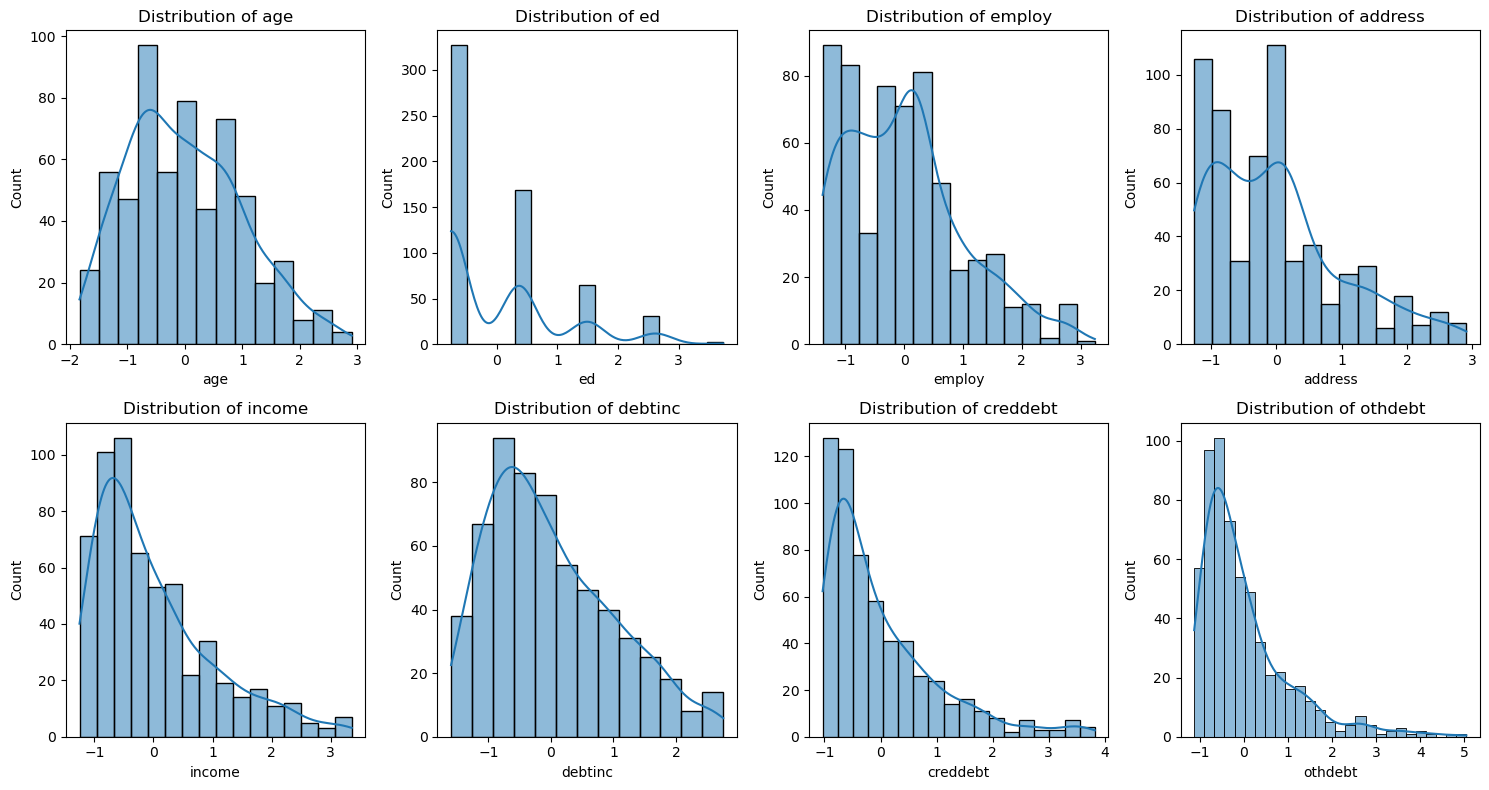

In [23]:
#figure no. 5 in report
# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(df_transformed.columns):
    sns.histplot(df_transformed[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Log Normalization

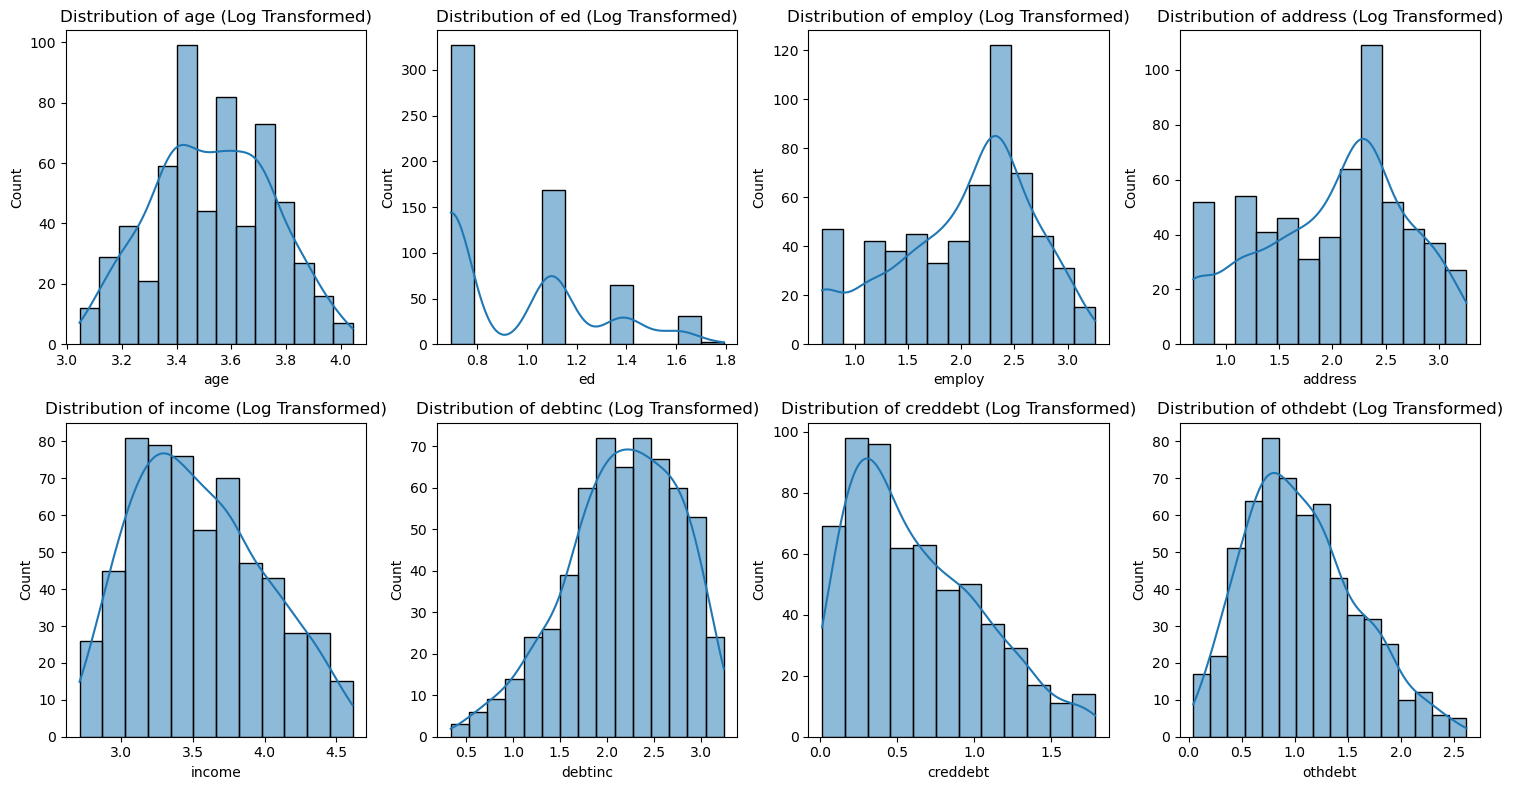

In [24]:
# Create subplots for each variable after log transformation
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    col_log_transformed = np.log1p(df[col])  # Applying log transformation
    sns.histplot(col_log_transformed, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Log Transformed)')

plt.tight_layout()
plt.show()

In [25]:
NormLog = df
df_LogNormalized_pop = np.log(NormLog)
dfN=pd.DataFrame(df_LogNormalized_pop)

Log Normalization of creddebt

In [26]:
df['LogNormalized_creddebt'] = np.log(df['creddebt'])

In [27]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,LogNormalized_creddebt
0,52,1,6.0,9.0,29,16.3,1.715901,3.011099,0.539938
1,48,1,22.0,15.0,100,9.1,3.703700,5.396300,1.309332
2,36,2,9.0,6.0,49,8.6,0.817516,3.396484,-0.201485
3,36,2,13.0,6.0,41,16.4,2.918216,3.805784,1.070972
4,43,1,23.0,19.0,72,7.6,1.181952,4.290048,0.167167
...,...,...,...,...,...,...,...,...,...
682,36,2,6.0,15.0,27,4.6,0.262062,0.979938,-1.339174
683,29,2,6.0,4.0,21,11.5,0.369495,2.045505,-0.995618
684,33,1,15.0,3.0,32,7.6,0.491264,1.940736,-0.710774
685,45,1,19.0,22.0,77,8.4,2.302608,4.165392,0.834042


# Model Building

#### Model 1 (creddebt vs all the independent variables)

In [28]:
reg = linear_model.LinearRegression()
y = df['creddebt'].values
X = df[['age', 'ed', 'employ', 'address', 'income','debtinc', 'othdebt']].values

In [29]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,LogNormalized_creddebt
0,52,1,6.0,9.0,29,16.3,1.715901,3.011099,0.539938
1,48,1,22.0,15.0,100,9.1,3.703700,5.396300,1.309332
2,36,2,9.0,6.0,49,8.6,0.817516,3.396484,-0.201485
3,36,2,13.0,6.0,41,16.4,2.918216,3.805784,1.070972
4,43,1,23.0,19.0,72,7.6,1.181952,4.290048,0.167167
...,...,...,...,...,...,...,...,...,...
682,36,2,6.0,15.0,27,4.6,0.262062,0.979938,-1.339174
683,29,2,6.0,4.0,21,11.5,0.369495,2.045505,-0.995618
684,33,1,15.0,3.0,32,7.6,0.491264,1.940736,-0.710774
685,45,1,19.0,22.0,77,8.4,2.302608,4.165392,0.834042


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
reg.fit(X_train, y_train)
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [-0.00299636 -0.0277467   0.00051985  0.01085583  0.04127846  0.16799431
 -0.24727818]
Intercept: -1.3908516729551264


In [32]:
y_pred = reg.predict(X_test)

In [33]:
r = reg.score(X_test,y_test) ** 0.5
rss = np.sum((y_test - y_pred) ** 2)
r_squared = reg.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)
print('r-score for the model is: ', r)
print('residual sum of squares is: ', rss)
print('r-square for the model is:', r_squared)
print('Mean squared error is: ', mse)

r-score for the model is:  0.743798207369778
residual sum of squares is:  57.6945376853526
r-square for the model is: 0.5532357732864952
Mean squared error is:  0.48482804777607225


In [34]:
residuals = y_test - y_pred

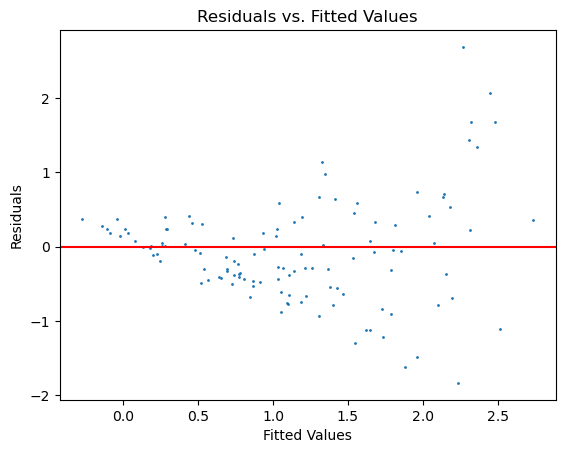

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_pred, residuals, s = 1)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values')
plt.show()

In [36]:
stat, pvalue = normaltest(residuals)
print("Normality test statistic:", stat)
print("p-value:", pvalue)

Normality test statistic: 21.435522462049047
p-value: 2.2148047130529726e-05


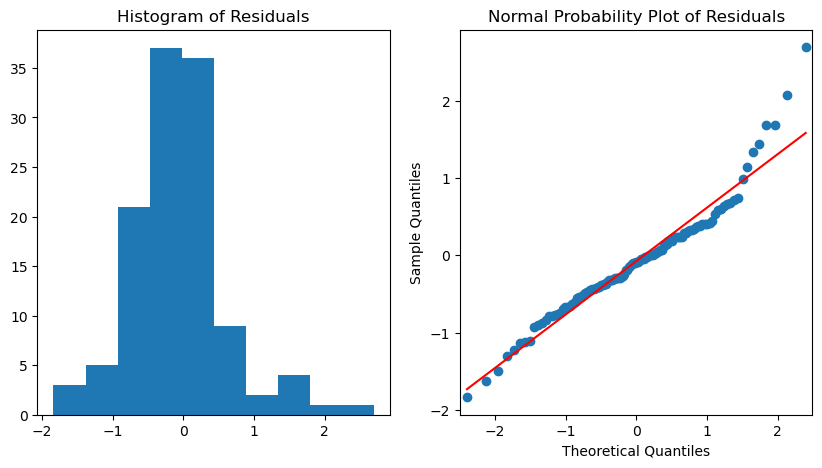

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(residuals, bins=10)
ax[0].set_title("Histogram of Residuals")

qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title("Normal Probability Plot of Residuals")
plt.show()

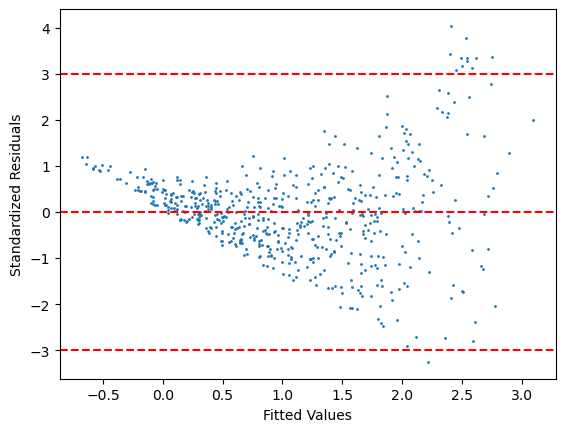

In [38]:
model = sm.OLS(y, sm.add_constant(X)).fit()
std_resid = model.get_influence().resid_studentized_internal

plt.scatter(model.fittedvalues, std_resid, s = 1)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.show()

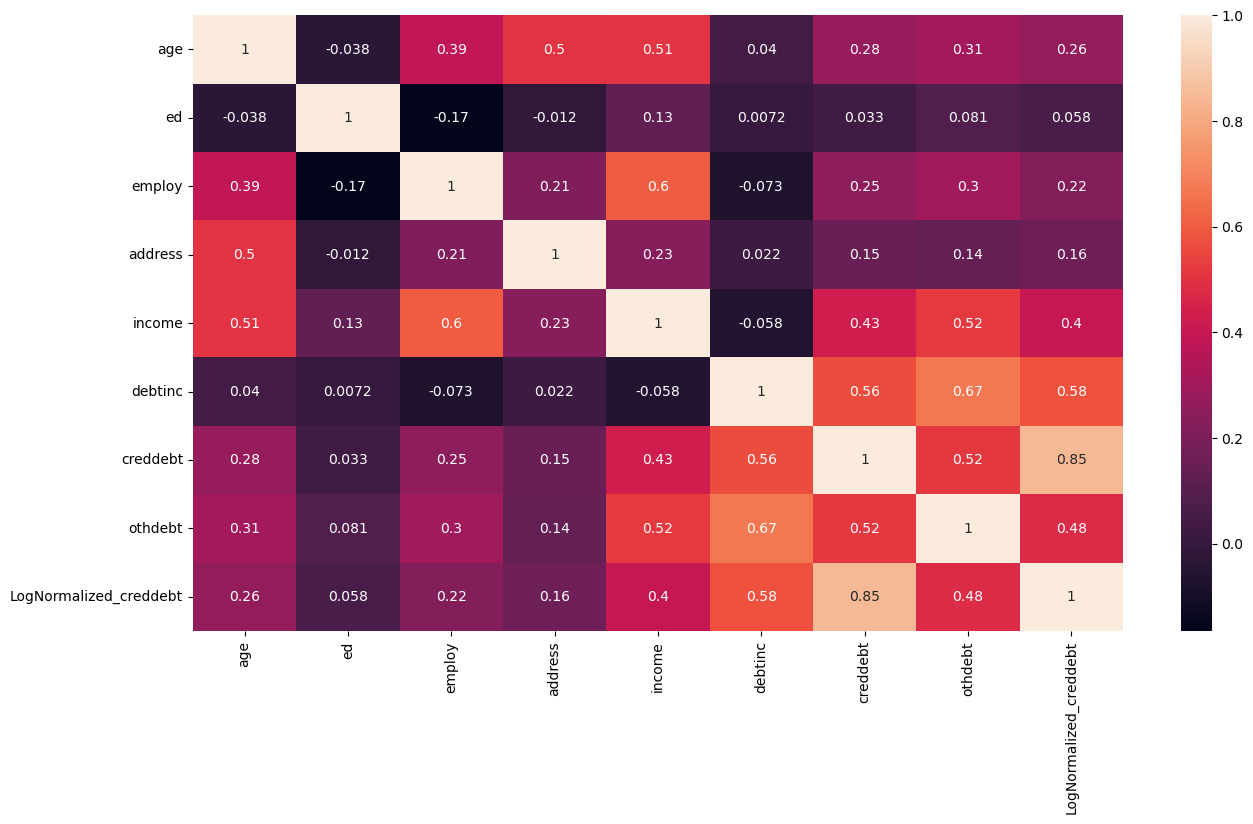

In [39]:
plt.figure(figsize = (15,8))
heatmap = sns.heatmap(df.corr(), annot = True)

In [40]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming df is your DataFrame
corre_df = pd.DataFrame(columns=['Column', 'Correlation', 'P-value'])

for col in df.columns:
    corr, p_val = pearsonr(df[col], df['creddebt'])
    corre_df = pd.concat([corre_df, pd.DataFrame({'Column': [col], 'Correlation': [corr], 'P-value': [p_val]})], ignore_index=True)
corre_df

,Column,Correlation,P-value
0,age,0.275956,7.657013e-12
1,ed,0.032663,4.268472e-01
2,employ,0.252101,4.598256e-10
3,address,0.150516,2.317257e-04
4,income,0.433225,1.426902e-28
5,debtinc,0.564044,3.431816e-51
6,creddebt,1.000000,0.000000e+00
7,othdebt,0.515928,1.035506e-41
8,LogNormalized_creddebt,0.848708,6.387218e-166


we can see from above correlation table that level of education and number of year at current address are not highly correlated to the dependent variable.so we will exclude them one by one for the prediction in next model.

dataframe with reduced dimension following the above method

In [41]:
selected_features = ['age','employ','income','address','debtinc','othdebt','creddebt','LogNormalized_creddebt']
df2=df[selected_features]

In [42]:
df2

,age,employ,income,address,debtinc,othdebt,creddebt,LogNormalized_creddebt
0,52,6.0,29,9.0,16.3,3.011099,1.715901,0.539938
1,48,22.0,100,15.0,9.1,5.396300,3.703700,1.309332
2,36,9.0,49,6.0,8.6,3.396484,0.817516,-0.201485
3,36,13.0,41,6.0,16.4,3.805784,2.918216,1.070972
4,43,23.0,72,19.0,7.6,4.290048,1.181952,0.167167
...,...,...,...,...,...,...,...,...
682,36,6.0,27,15.0,4.6,0.979938,0.262062,-1.339174
683,29,6.0,21,4.0,11.5,2.045505,0.369495,-0.995618
684,33,15.0,32,3.0,7.6,1.940736,0.491264,-0.710774
685,45,19.0,77,22.0,8.4,4.165392,2.302608,0.834042


# Model 2 (LogNormalized_creddebt vs all the variables)

In [43]:
reg0 = linear_model.LinearRegression()
y0 = df2['LogNormalized_creddebt']
X0 = df[['age','employ','income','debtinc','othdebt','address','ed']]

In [44]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, random_state=42)

In [45]:
reg0.fit(X0_train, y0_train)

print('Coefficients:', reg0.coef_)
print('Intercept:', reg0.intercept_)

Coefficients: [-0.00237894 -0.00061602  0.04686234  0.2052489  -0.3414852   0.0120175
  0.0049913 ]
Intercept: -3.291422341728798


In [46]:
y_pred0 = reg0.predict(X0_test)

In [47]:
r0 = reg0.score(X0_test,y0_test) ** 0.5
rss0 = np.sum((y0_test - y_pred0) ** 2)
r_squared0 = reg0.score(X0_test,y0_test)
mse0 = mean_squared_error(y0_test, y_pred0)
print('r-score for the model is: ', r0)
print('residual sum of squares is: ', rss0)
print('r-square for the model is:', r_squared0)
print('Mean squared error is: ', mse0)

r-score for the model is:  0.7877292839606398
residual sum of squares is:  49.62271524223537
r-square for the model is: 0.6205174248091423
Mean squared error is:  0.4169976070776082


In [48]:
residuals0 = y0_test - y_pred0

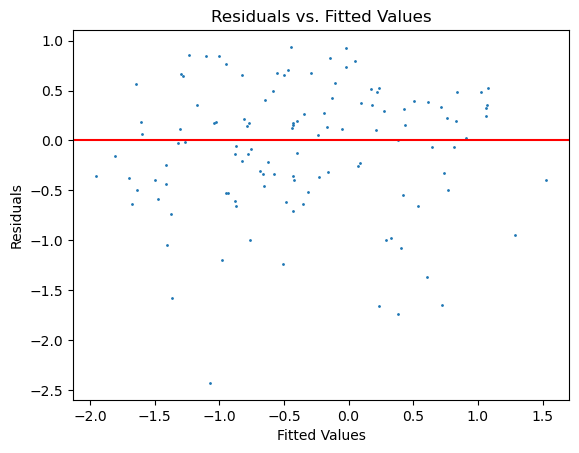

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_pred0, residuals0, s = 1)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values')
plt.show()

In [50]:
stat, pvalue = normaltest(residuals0)
print("Normality test statistic:", stat)
print("p-value:", pvalue)

Normality test statistic: 16.25880846037452
p-value: 0.0002947437479352809


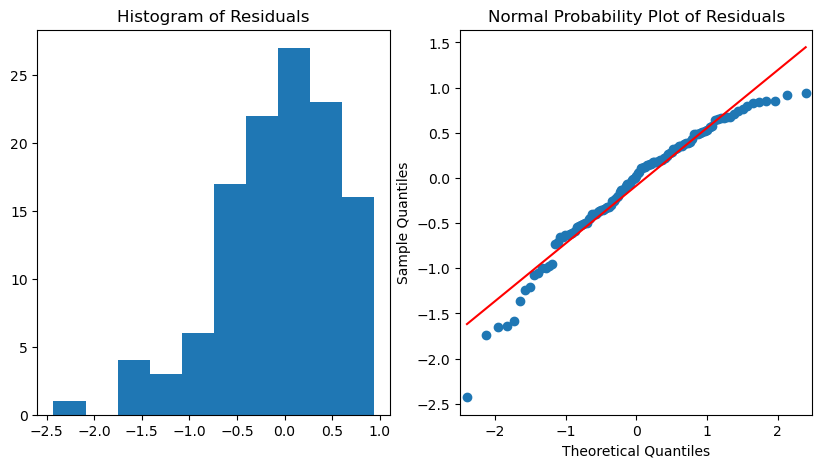

In [51]:
#figure no. 7 in report
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(residuals0, bins=10)
ax[0].set_title("Histogram of Residuals")
qqplot(residuals0, line='s', ax=ax[1])
ax[1].set_title("Normal Probability Plot of Residuals")
plt.show()

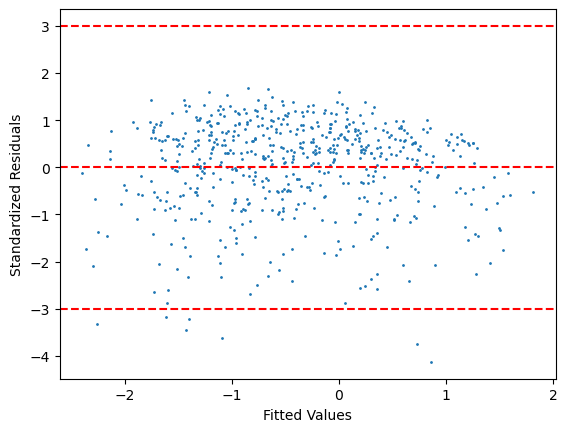

In [52]:
model = sm.OLS(y0, sm.add_constant(X0)).fit()
std_resid = model.get_influence().resid_studentized_internal

plt.scatter(model.fittedvalues, std_resid, s = 1)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.show()

# Model 3 (LogNormalized_creddebt vs dimensionally reduced independent variables)

In [53]:
reg01 = linear_model.LinearRegression()
df3 = df2.drop('LogNormalized_creddebt', axis=1)
y01 = df2['LogNormalized_creddebt']
X01 = df2[['age','employ','income','debtinc','othdebt','address']]

In [54]:
X01_train, X01_test, y01_train, y01_test = train_test_split(X01, y01, test_size=0.2, random_state=42)

In [55]:
reg01.fit (X01_train, y01_train)
print('Coefficients:', reg01.coef_)
print('Intercept:', reg01.intercept_)

Coefficients: [-0.00244396 -0.00092576  0.04695196  0.20523147 -0.34141641  0.01204231]
Intercept: -3.281840604968782


In [56]:
y_pred01 = reg01.predict(X01_test)

In [57]:
r01 = reg01.score(X01_test,y01_test) ** 0.5
rss01 = np.sum((y01_test - y_pred01) ** 2)
r_squared01 = reg01.score(X01_test,y01_test)
mse01 = mean_squared_error(y01_test, y_pred01)
print('r-score for the model is: ', r01)
print('residual sum of squares is: ', rss01)
print('r-square for the model is:', r_squared01)
print('Mean squared error is: ', mse01)

r-score for the model is:  0.7876969289339946
residual sum of squares is:  49.62938067748955
r-square for the model is: 0.6204664518520464
Mean squared error is:  0.41705361913856764


In [58]:
residuals01 = y01_test - y_pred01

In [59]:
stat, pvalue = normaltest(residuals01)
print("Normality test statistic:", stat)
print("p-value:", pvalue)

Normality test statistic: 16.374819051168682
p-value: 0.0002781334494154973


### Model 4 LogNormalized_creddebt vs dimentionally reduced variables

In [60]:
reg02 = linear_model.LinearRegression()
y02 = df2['LogNormalized_creddebt']
X02 = df2[['age','employ','income','debtinc','othdebt']]

In [61]:
X02_train, X02_test, y02_train, y02_test = train_test_split(X02, y02, test_size=0.2, random_state=42)

In [62]:
reg02.fit (X02_train, y02_train)
print('Coefficients:', reg01.coef_)
print('Intercept:', reg01.intercept_)

Coefficients: [-0.00244396 -0.00092576  0.04695196  0.20523147 -0.34141641  0.01204231]
Intercept: -3.281840604968782


In [63]:
y_pred02 = reg02.predict(X02_test)

In [64]:
r02 = reg02.score(X02_test,y02_test) ** 0.5
rss02 = np.sum((y02_test - y_pred02) ** 2)
r_squared02 = reg02.score(X02_test,y02_test)
mse02 = mean_squared_error(y02_test, y_pred02)
print('r-score for the model is: ', r02)
print('residual sum of squares is: ', rss02)
print('r-square for the model is:', r_squared02)
print('Mean squared error is: ', mse02)


r-score for the model is:  0.790955287869382
residual sum of squares is:  48.95675402397342
r-square for the model is: 0.6256102674085369
Mean squared error is:  0.4114012943191043


In [65]:
residuals02 = y02_test - y_pred02

In [66]:
stat, pvalue = normaltest(residuals0)
print("Normality test statistic:", stat)
print("p-value:", pvalue)

Normality test statistic: 16.25880846037452
p-value: 0.0002947437479352809


### Model 5 LogNormalized_creddebt vs LogNormalized independent variables

In [67]:
dfN

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,3.951244,0.000000,1.791759,2.197225,3.367296,2.791165,0.539938,1.102305
1,3.871201,0.000000,3.091042,2.708050,4.605170,2.208274,1.309332,1.685714
2,3.583519,0.693147,2.197225,1.791759,3.891820,2.151762,-0.201485,1.222741
3,3.583519,0.693147,2.564949,1.791759,3.713572,2.797281,1.070972,1.336522
4,3.761200,0.000000,3.135494,2.944439,4.276666,2.028148,0.167167,1.456298
...,...,...,...,...,...,...,...,...
682,3.583519,0.693147,1.791759,2.708050,3.295837,1.526056,-1.339174,-0.020266
683,3.367296,0.693147,1.791759,1.386294,3.044522,2.442347,-0.995618,0.715645
684,3.496508,0.000000,2.708050,1.098612,3.465736,2.028148,-0.710774,0.663067
685,3.806662,0.000000,2.944439,3.091042,4.343805,2.128232,0.834042,1.426810


In [68]:
regN = linear_model.LinearRegression()
yN = dfN['creddebt'].values
XN = dfN[['age', 'ed', 'employ', 'address', 'income','debtinc', 'othdebt']].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(XN, yN, test_size=0.2, random_state=42)

In [70]:
reg.fit(X_train, y_train)

print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [-0.08267974 -0.01638668 -0.01190499  0.05550336  3.12452838  3.09253939
 -2.07751023]
Intercept: -16.344984692887092


In [71]:
y_pred = reg.predict(X_test)

In [72]:
r = reg.score(X_test,y_test) ** 0.5
rss = np.sum((y_test - y_pred) ** 2)
r_squared = reg.score(X_test,y_test)
mse = mean_squared_error(y_test, y_pred)
print('r-score for the model is: ', r)
print('residual sum of squares is: ', rss)
print('r-square for the model is:', r_squared)
print('Mean squared error is: ', mse)

r-score for the model is:  0.8993802504274344
residual sum of squares is:  24.991011546443566
r-square for the model is: 0.8088848348589147
Mean squared error is:  0.21000850039028207


In [73]:
residuals = y_test - y_pred

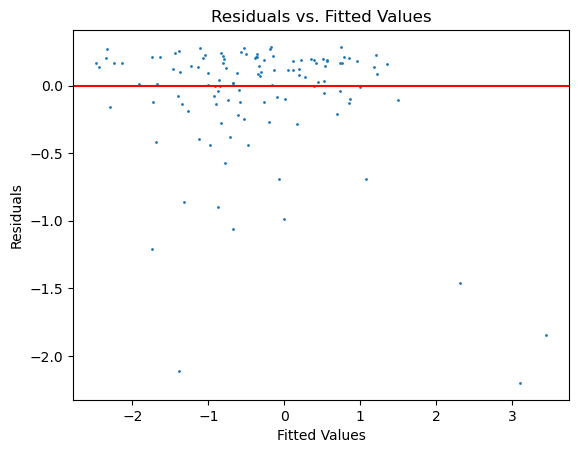

In [74]:

fig, ax = plt.subplots()
ax.scatter(y_pred, residuals, s = 1)
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Fitted Values')
plt.show()

In [75]:
stat, pvalue = normaltest(residuals)
print("Normality test statistic:", stat)
print("p-value:", pvalue)

Normality test statistic: 89.76235345816333
p-value: 3.2236850504278565e-20


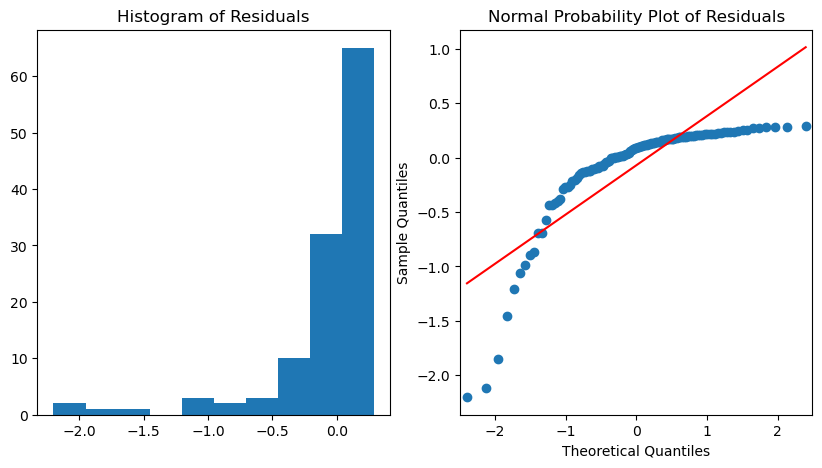

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(residuals, bins=10)
ax[0].set_title("Histogram of Residuals")

qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title("Normal Probability Plot of Residuals")
plt.show()

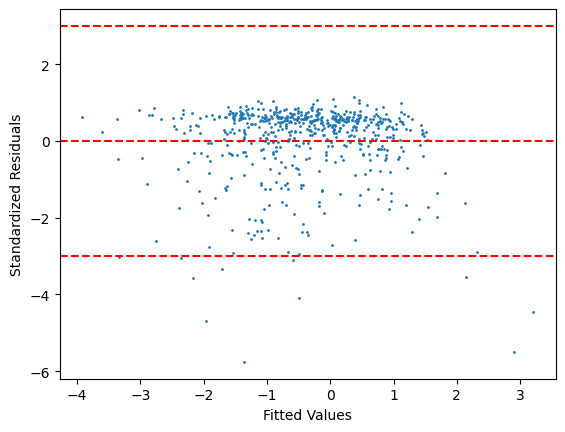

In [77]:
model = sm.OLS(yN, sm.add_constant(XN)).fit()
std_resid = model.get_influence().resid_studentized_internal

plt.scatter(model.fittedvalues, std_resid, s = 1)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.show()

In [78]:
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan test statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('Lagrange multiplier statistic:', bp_test[2])
print('p-value for Lagrange multiplier test:', bp_test[3])

Breusch-Pagan test statistic: 11.043167422976275
p-value: 0.13674713112037074
Lagrange multiplier statistic: 1.5858307531125535
p-value for Lagrange multiplier test: 0.13672144195419592


# Robust regression method

The results of the normality test (89.76235345816333) indicate that the data does not follow a normal distribution. The low p-value (3.2236850504278565e-20) suggests that the departure from normality is statistically significant.We will choose statistical methods that are robust to deviations from normality.Statsmodels is a library that provides a robust regression implementation.

### Robust regression using Least Trimmed Squares (LTS) method and  Least Absolute Deviations (LAD)  

In [79]:
dfN

,age,ed,employ,address,income,debtinc,creddebt,othdebt
0,3.951244,0.000000,1.791759,2.197225,3.367296,2.791165,0.539938,1.102305
1,3.871201,0.000000,3.091042,2.708050,4.605170,2.208274,1.309332,1.685714
2,3.583519,0.693147,2.197225,1.791759,3.891820,2.151762,-0.201485,1.222741
3,3.583519,0.693147,2.564949,1.791759,3.713572,2.797281,1.070972,1.336522
4,3.761200,0.000000,3.135494,2.944439,4.276666,2.028148,0.167167,1.456298
...,...,...,...,...,...,...,...,...
682,3.583519,0.693147,1.791759,2.708050,3.295837,1.526056,-1.339174,-0.020266
683,3.367296,0.693147,1.791759,1.386294,3.044522,2.442347,-0.995618,0.715645
684,3.496508,0.000000,2.708050,1.098612,3.465736,2.028148,-0.710774,0.663067
685,3.806662,0.000000,2.944439,3.091042,4.343805,2.128232,0.834042,1.426810


# Least Trimmed Squares (LTS) method

In [80]:
import statsmodels.api as sm

# Specify the independent variables
X = dfN[['age','ed','employ','address','income','debtinc','othdebt']] 

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Specify the dependent variable
y = dfN['creddebt'] 


# Fit a robust linear model using the Least Trimmed Squares (LTS) method
model = sm.RLM(y, X, M=sm.robust.norms.TrimmedMean(0.5))
results = model.fit()

# Print the regression summary
print(results.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:               creddebt   No. Observations:                  594
Model:                            RLM   Df Residuals:                      586
Method:                          IRLS   Df Model:                            7
Norm:                     TrimmedMean                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 07 Jan 2024                                         
Time:                        13:21:04                                         
No. Iterations:                     3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.3752      0.124   -123.731      0.0

In [81]:
# Calculate predictions
y_pred = results.predict(X)

# Calculate metrics
rss_lts = np.sum((y - y_pred)**2)
mse_lts = mean_squared_error(y, y_pred)

# Print the results
print('residual sum of squares is:', rss_lts)
print('Mean squared error is:', mse_lts)

# Statsmodels RLMResults does not have rsquared attribute, so we use an alternative metric
# You can use other metrics like pseudo R-squared for robust models
pseudo_r_squared = 1 - (rss_lts / np.sum((y - np.median(y))**2))
print('Pseudo R-squared for the model is:', pseudo_r_squared)

residual sum of squares is: 84.55307323617735
Mean squared error is: 0.1423452411383457
Pseudo R-squared for the model is: 0.8811961932907607


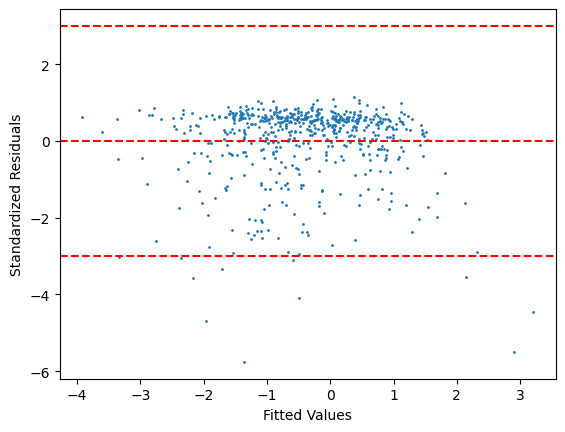

In [82]:
model = sm.OLS(y, sm.add_constant(X)).fit()
std_resid = model.get_influence().resid_studentized_internal

plt.scatter(model.fittedvalues, std_resid, s = 1)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.show()

In [83]:
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan test statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('Lagrange multiplier statistic:', bp_test[2])
print('p-value for Lagrange multiplier test:', bp_test[3])

Breusch-Pagan test statistic: 11.043167422976275
p-value: 0.13674713112037074
Lagrange multiplier statistic: 1.5858307531125535
p-value for Lagrange multiplier test: 0.13672144195419592


In [84]:
from scipy.stats import shapiro
residuals = results.resid
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals)

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results based on the p-value
if p_value > 0.05:
    print("The residuals are approximately normally distributed.")
else:
    print("There is evidence that the residuals may not be normally distributed.")

Shapiro-Wilk Test Statistic: 0.7894782423973083
P-value: 5.306138449059018e-27
There is evidence that the residuals may not be normally distributed.


### Least Absolute Deviations (LAD)

In [85]:
import statsmodels.api as sm

X = dfN[['ed','age','address','employ','income','debtinc','othdebt']]  

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

y = df['LogNormalized_creddebt']

# Fit a robust linear model using the Least Absolute Deviations (LAD) method
model = sm.RLM(y, X, M=sm.robust.norms.HuberT(1.345))  # Use a large value of c for L1 norm behavior
results = model.fit()

# Print the regression summary
print(results.summary())

                      Robust linear Model Regression Results                      
Dep. Variable:     LogNormalized_creddebt   No. Observations:                  594
Model:                                RLM   Df Residuals:                      586
Method:                              IRLS   Df Model:                            7
Norm:                              HuberT                                         
Scale Est.:                           mad                                         
Cov Type:                              H1                                         
Date:                    Sun, 07 Jan 2024                                         
Time:                            13:21:04                                         
No. Iterations:                        34                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [86]:
# Calculate predictions
y_pred = results.predict(X)

# Calculate metrics
rss_lts = np.sum((y - y_pred)**2)
mse_lts = mean_squared_error(y, y_pred)

# Print the results
print('residual sum of squares is:', rss_lts)
print('Mean squared error is:', mse_lts)

# Statsmodels RLMResults does not have rsquared attribute, so we use an alternative metric
# You can use other metrics like pseudo R-squared for robust models
pseudo_r_squared = 1 - (rss_lts / np.sum((y - np.median(y))**2))
print('Pseudo R-squared for the model is:', pseudo_r_squared)

residual sum of squares is: 86.17668639089304
Mean squared error is: 0.14507859661766506
Pseudo R-squared for the model is: 0.8789148874077134


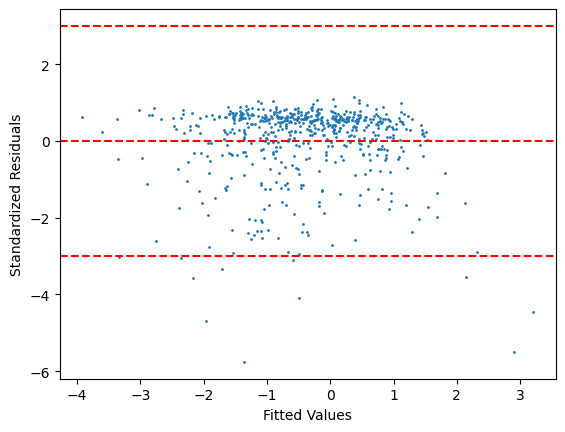

In [87]:
model = sm.OLS(y, sm.add_constant(X)).fit()
std_resid = model.get_influence().resid_studentized_internal

plt.scatter(model.fittedvalues, std_resid, s = 1)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')
plt.show()

In [88]:
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan test statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('Lagrange multiplier statistic:', bp_test[2])
print('p-value for Lagrange multiplier test:', bp_test[3])

Breusch-Pagan test statistic: 11.043167422976275
p-value: 0.13674713112037074
Lagrange multiplier statistic: 1.585830753112549
p-value for Lagrange multiplier test: 0.13672144195419592


In [89]:
from scipy.stats import shapiro
residuals = results.resid
# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(residuals)

# Print the results
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results based on the p-value
if p_value > 0.05:
    print("The residuals are approximately normally distributed.")
else:
    print("There is evidence that the residuals may not be normally distributed.")

Shapiro-Wilk Test Statistic: 0.7271236181259155
P-value: 4.9591484838592236e-30
There is evidence that the residuals may not be normally distributed.
